In [5]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

In [6]:
# Función auxiliar para generar una lista de aristas según el modelo de Erdos-Renyi
def gen_lista(n=10, p=0.2):
    edge_list = []
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                edge_list.append((i, j))
    return edge_list

In [7]:
# Tamaños de los grafos
sizes = [1e2, 1e3, 1e4]

# Arreglo de valores c para comparar
cs = np.arange(-3, 4, 0.5)

# Resultados
R = np.zeros((len(sizes), len(cs)))


for k, sz in enumerate(sizes):
    #Parámetros para el grafo
    n = int(sz)
    pci = math.log(n) / n
    probs = pci + cs/n
    print(sz)
    for j, p in enumerate(probs):
        count = 0
        
        for i in range(30):
            # Generar el grafo y añadir nodos y aristas
            G = nx.Graph()
            G.add_nodes_from(range(n))
            G.add_edges_from(gen_lista(n, p))
            count += nx.is_connected(G)
        R[k, j] = count / 30

100.0
1000.0
10000.0


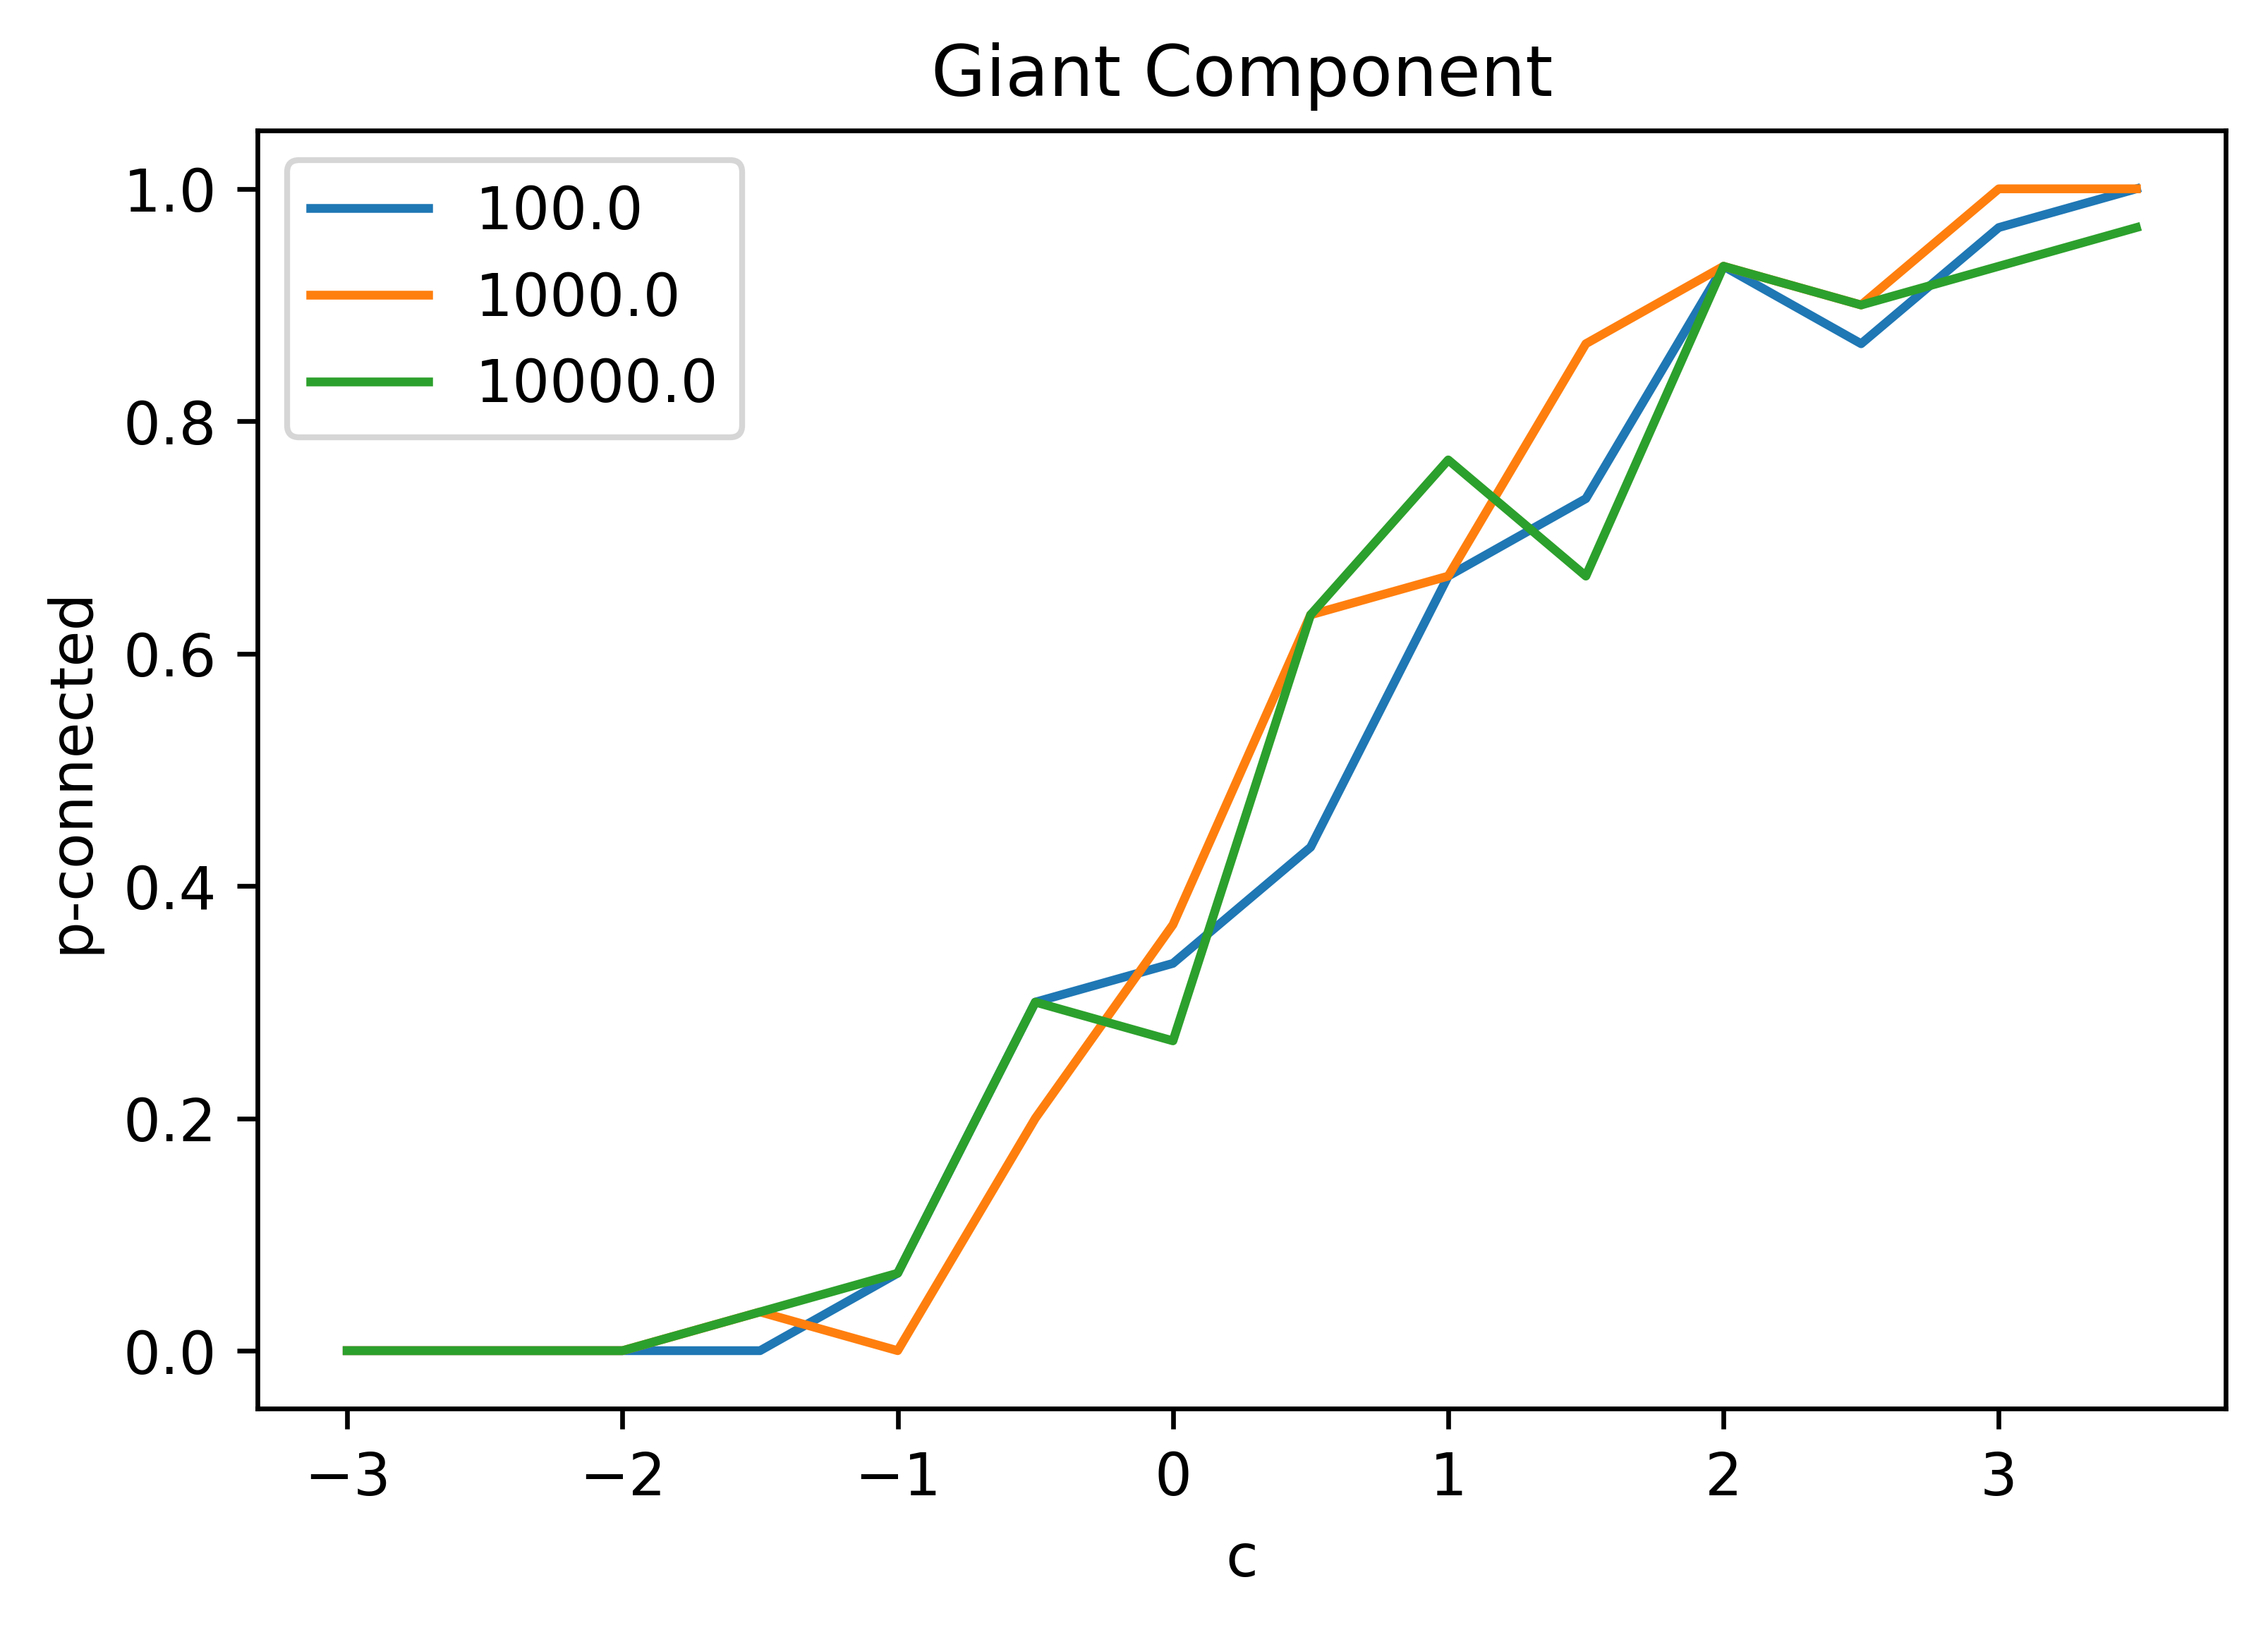

In [8]:
plt.figure(dpi=300)

for i, sz in enumerate(sizes):
    # Graficar para cada tamaño
    plt.plot(cs, R[i], label=str(sz))

plt.title("Giant Component")
plt.xlabel("c")
plt.ylabel("p-connected")
plt.legend()